# Решающие деревья

![](https://i0.wp.com/docs.microsoft.com/en-us/azure/machine-learning/studio/media/algorithm-choice/image5.png?resize=495%2C706&ssl=1)

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции - ансамблях (Random Forest, XGBoost, LightGBM).

## Линейные модели или решающие деревья?

- когда данные хорошо линейно разделимы, линейная модель лучше

- когда данные плохо линейно разделимы (много сложных нелинейных зависимостей в данных), модель, основанная на решающих деревьях, лучше

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (11, 6.5)

Линейно разлимый пример

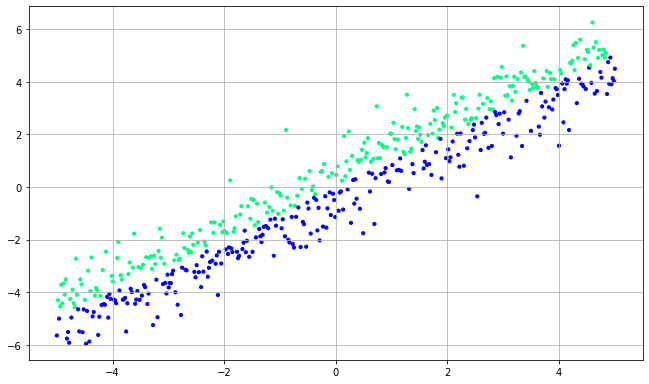

In [3]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.9 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap='winter')
plt.grid()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

**Задание**: Обучите Логистическую регрессию и посчитайте точность на тесте

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)

0.992

In [ ]:
`mlxtend` позволяет красиво рисовать границы классов. Установим его и нарисуем

In [6]:
!pip install mlxtend

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


(-6.0, 5.719438877755511, -6.8724348422776504, 6.389930192311469)

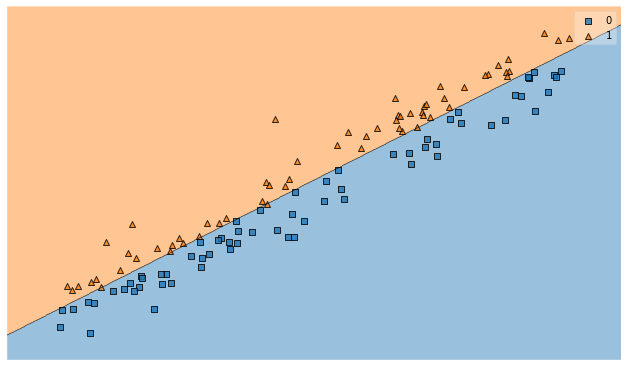

In [7]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, lr)
plt.axis('off')

Теперь используем нелинейную модель - `DecisionTreeClassifier`

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)

0.888

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


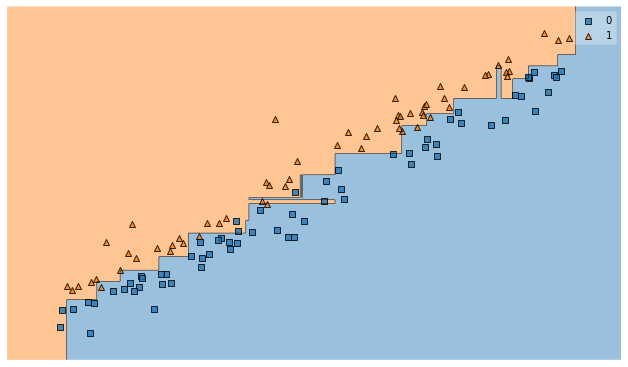

In [9]:
plot_decision_regions(X_test, y_test, dt)
plt.axis('off')
plt.show()

---
Теперь пример, когда данные линейно неразделимы.

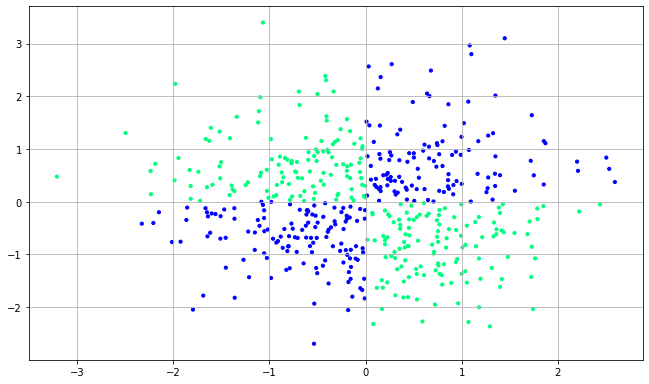

In [10]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap='winter')
plt.grid()
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

---
**Задание**: Обучите Логистическую регрессию и дерево решений. Для обеих моделей посчитайте точность на тесте и нарисуйте границы классов

In [13]:
def train_model(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  y_hat = model.predict(X_test)
  acc = accuracy_score(y_hat, y_test)
  print(acc)
  return model, y_hat

# Train logistic regression and compute accuracy
lr = LogisticRegression()
dtr = DecisionTreeClassifier()

dtr, y_dtr_hat = train_model(X_train, y_train, X_test, y_test, dtr)
lr, y_lr_hat = train_model(X_train, y_train, X_test, y_test, lr)

# YOUR CODE HERE


# Train Decision Tree and compute accuracy

0.968
0.392


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Decision tree ')

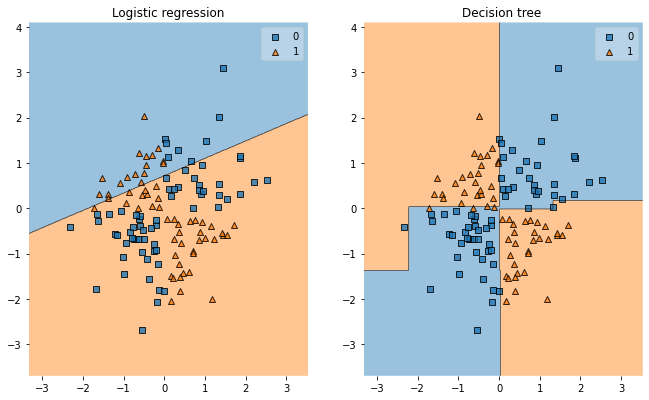

In [18]:
# Plot decision region for logistic regression
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plot_decision_regions(X_test, y_test, lr, ax=ax[0]);
ax[0].set_title('Logistic regression');

plot_decision_regions(X_test, y_test, dtr, ax=ax[1]);
ax[1].set_title('Decision tree ');
# Plot decision region for decision tree


## Переобучение

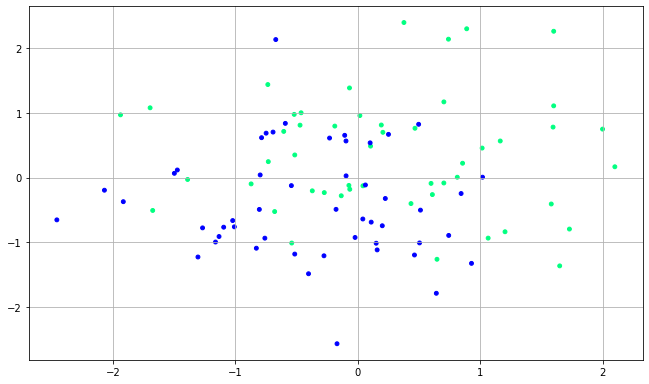

In [19]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=15, c=y, cmap='winter')
plt.grid()
plt.show()

Как влияют разные значения гиперпараметров решающего дерева на его структуру?

In [20]:
??DecisionTreeClassifier

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

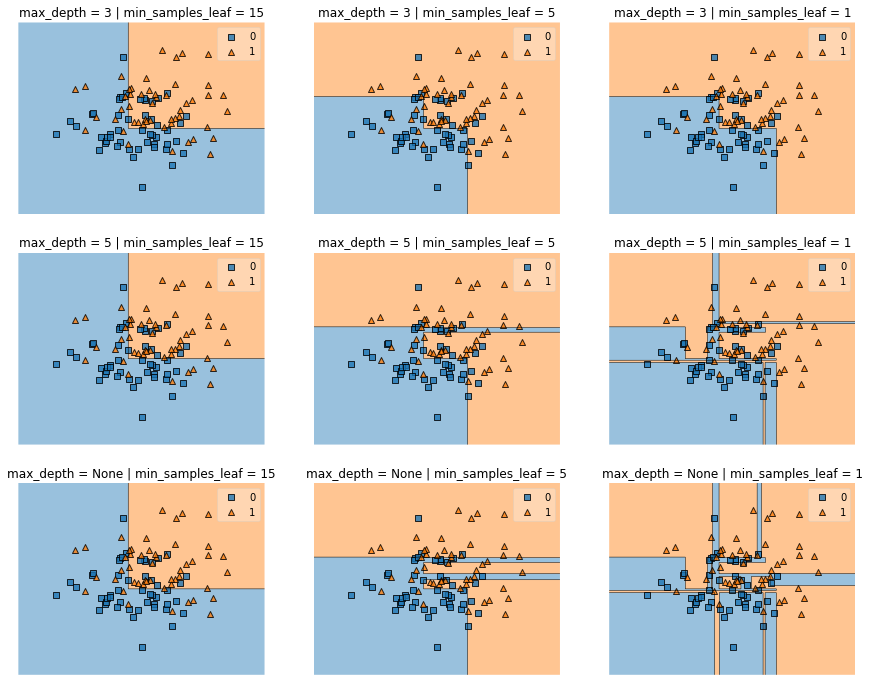

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
        ax[i][j].axis('off')
        plot_decision_regions(X, y, dt, ax=ax[i][j])
plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


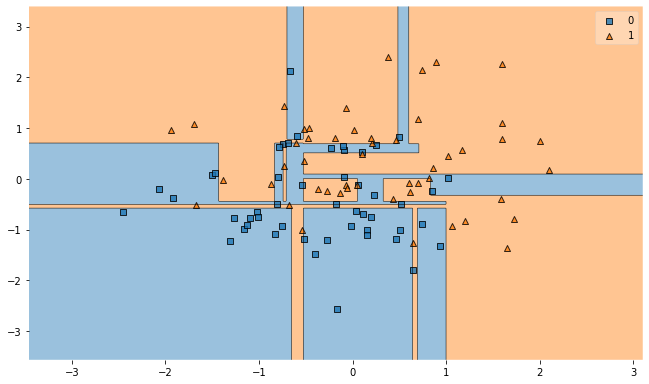

In [22]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
dt.fit(X, y)
plot_decision_regions(X, y, dt)
plt.show()

**Задание** Посчитайте точность алгоритма изображенного выше на обучающей выборке

In [23]:
y_hat = dt.predict(X_test)
accuracy_score(y_test, y_hat)

0.488

## Неустойчивость

**Задание** Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки. Заполните пропуски в коде

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

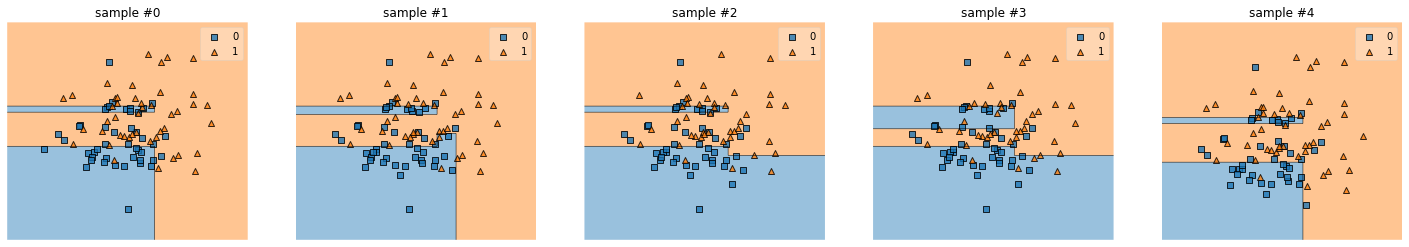

In [31]:
def select_subsample(X, y):
    idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
    X_part, y_part = X[idx_part, :], y[idx_part]
    return X_part, y_part

fig, ax = plt.subplots(ncols=5, figsize=(25, 4))
for i in range(5):
    np.random.seed(i)
    # create subsample
    X_p, y_p = select_subsample(X, y)
    dt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=4)
    dt.fit(X_p, y_p)

    ax[i].set_title('sample #{}'.format(i))
    ax[i].axis('off')
    plot_decision_regions(X_p, y_p, dt, ax=ax[i])
  

plt.show()

## Практика

Теперь потренируемся на более реальном датасете.

In [32]:
import pandas as pd
from sklearn.datasets import load_boston

In [33]:
boston = load_boston()

In [35]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [36]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [37]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
y = boston['target']

print(X.shape, y.shape)

(506, 13) (506,)


In [39]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Задание** Нарисуйте гистограмму для целевой переменной

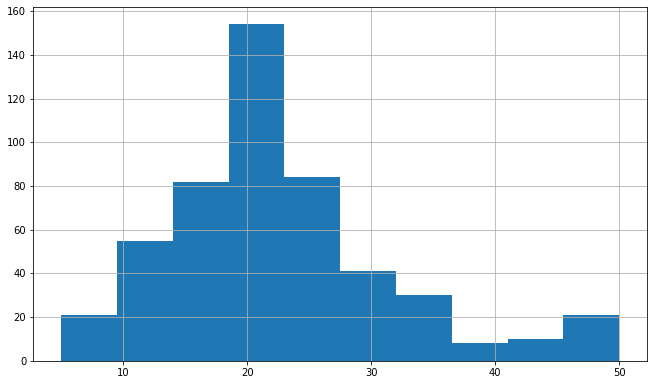

In [42]:
plt.hist(y);
plt.grid();
#YOUR CODE HERE


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

## Решающее дерево: sklearn

In [47]:
??DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

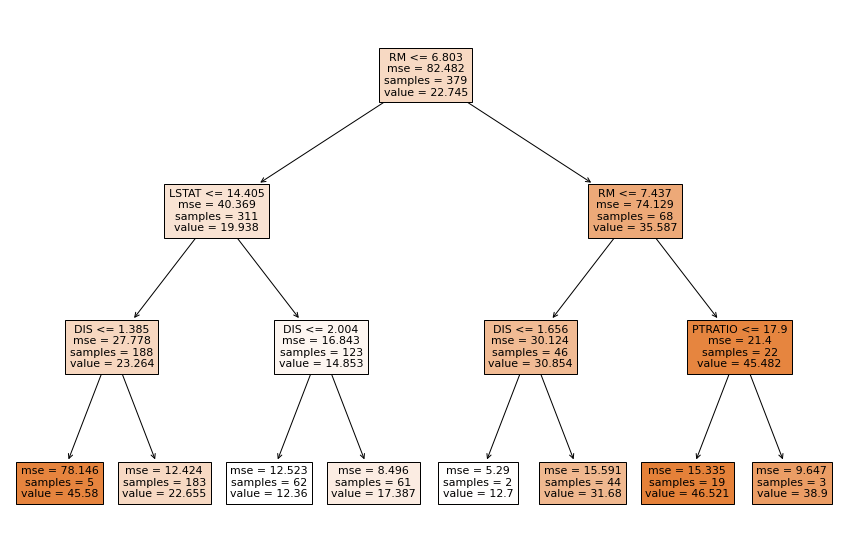

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=False)
plt.show()

In [52]:
from sklearn.linear_model import RidgeCV
lr = RidgeCV()
lr.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [56]:
mean_squared_error(y_test, lr.predict(X_test), squared=False)

5.095218560450664

In [50]:
mean_squared_error(y_test, [np.mean(y_train)]*len(y_test), squared=False)

9.506981049172166

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt.predict(X_test), squared=False)

6.140613542993184

**Задание** Давайте посмотрим, как меняется ошибка в зависимости от глубины. Заполните пропуски

In [78]:
dt = DecisionTreeRegressor(random_state=13)
dt.fit(X_train, y_train)
mean_squared_error(y_test, dt.predict(X_test), squared=False)

4.51683255343714

In [73]:
dt.get_depth()

20

In [74]:
dt.get_n_leaves()

351

In [75]:
X_train.shape

(379, 13)

In [76]:
X_test.shape

(127, 13)

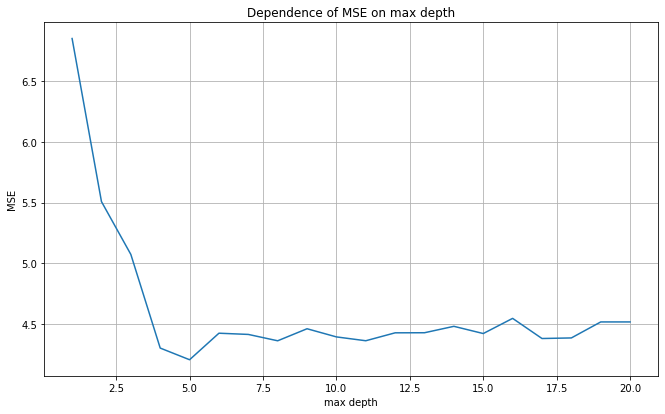

In [79]:
max_depth_array = range(1, 21)
rmse_array = []

for max_depth in max_depth_array:
    # train tree with `max_depth`
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    
    # calculate RMSE and add to the list `rmse_array`
    y_pred = dt.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_array.append(rmse)
    
plt.plot(max_depth_array, rmse_array)
plt.title('Dependence of MSE on max depth')
plt.xlabel('max depth')
plt.ylabel('MSE')
plt.grid()

In [58]:
pd.DataFrame({
    'max_depth': max_depth_array,
    'RMSE': rmse_array
}).sort_values(by='RMSE').reset_index(drop=True)

,max_depth,RMSE
0,6,3.501395
1,12,3.558794
2,7,3.580854
3,8,3.638769
4,20,3.685735
5,17,3.802249
6,16,3.875529
7,14,3.900175
8,19,3.995273
9,5,4.131723


**Задание** Давайте посмотрим, как меняется ошибка в зависимости от параметра `min_samples_leaf` при фиксированной глубине (`max_depth=6`). Заполните пропуски.

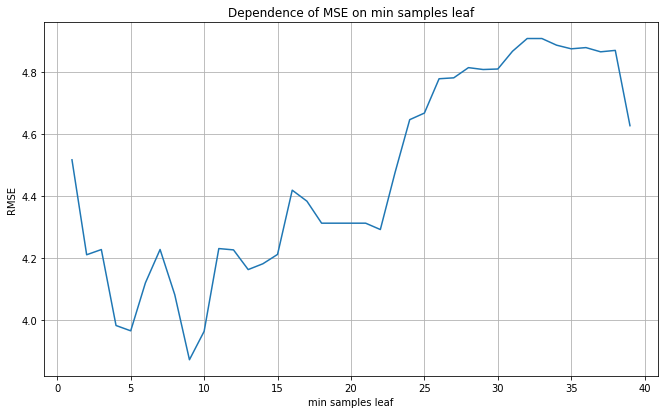

In [80]:
min_samples_leaf_array = range(1, 40)
rmse_array = []
for min_samples_leaf in min_samples_leaf_array:
    # train tree with `min_samples_leaf`
    dt = DecisionTreeRegressor(max_depth=20, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    rmse_array.append(mean_squared_error(y_test, dt.predict(X_test), squared=False))

    # calculate RMSE and add to the list `rmse_array`
    
plt.plot(min_samples_leaf_array, rmse_array)
plt.title('Dependence of MSE on min samples leaf')
plt.xlabel('min samples leaf')
plt.ylabel('RMSE')
plt.grid()

In [81]:
pd.DataFrame({
    'min_samples_leaf': min_samples_leaf_array,
    'RMSE': rmse_array
}).sort_values(by='RMSE').reset_index(drop=True)

,min_samples_leaf,RMSE
0,9,3.873270
1,10,3.964751
2,5,3.966341
3,4,3.983467
4,8,4.082587
5,6,4.120648
6,13,4.163499
7,14,4.182191
8,2,4.211207
9,15,4.212320


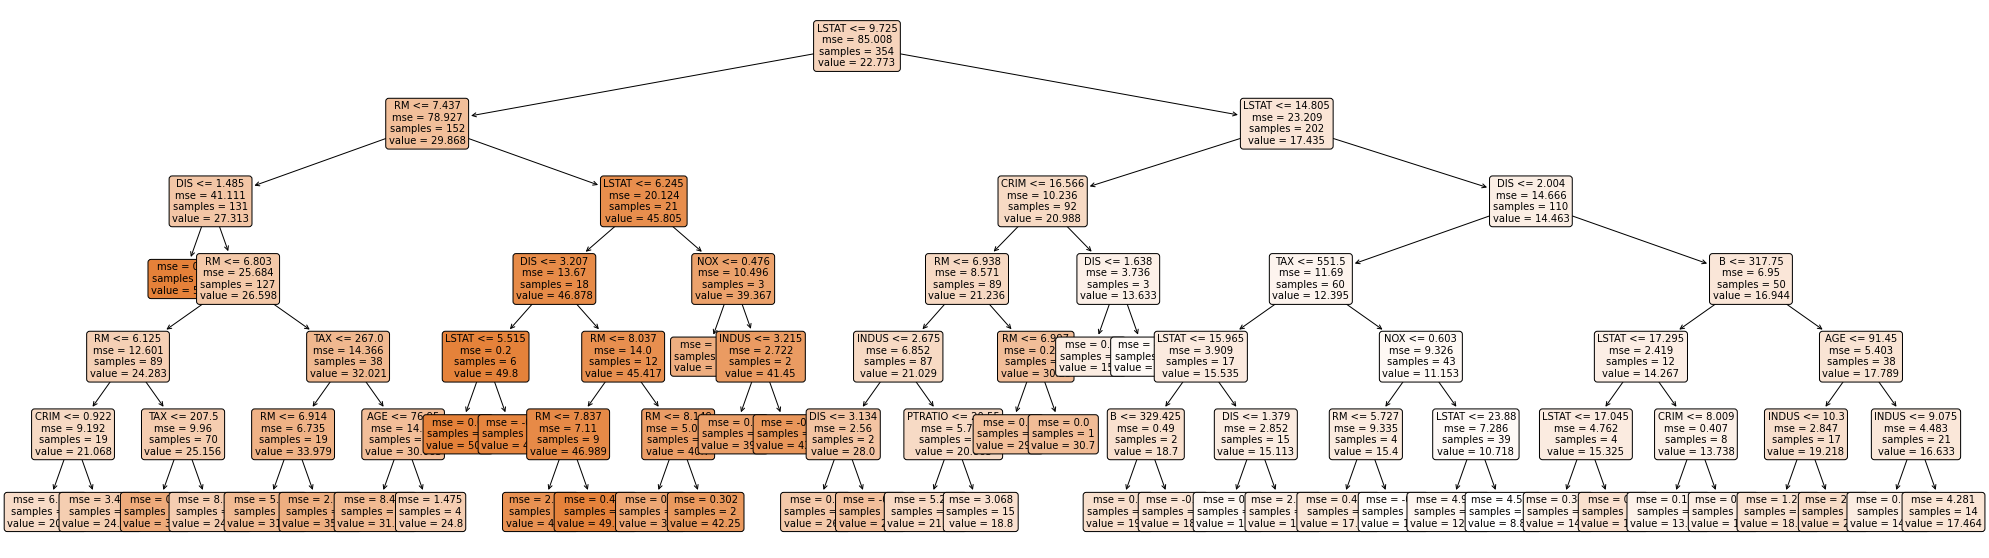

In [82]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=1, random_state=13)
dt.fit(X_train, y_train)

plt.figure(figsize=(35, 10))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [83]:
mean_squared_error(y_test, dt.predict(X_test), squared=False)

4.423828884182596

Решающие деревья позволяют посчитать важность признаков

In [84]:
dt.feature_importances_

array([0.00788446, 0.        , 0.00542276, 0.        , 0.00371011,
       0.29684039, 0.00713741, 0.09815333, 0.        , 0.01768875,
       0.00272878, 0.00401197, 0.55642205])

In [85]:
pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,LSTAT,0.556422
1,RM,0.296840
2,DIS,0.098153
3,TAX,0.017689
4,CRIM,0.007884
5,AGE,0.007137
6,INDUS,0.005423
7,B,0.004012
8,NOX,0.003710
9,PTRATIO,0.002729


Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [86]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
475,6.39312,0.0,18.10,0.0,0.584,6.162,97.4,2.2060,24.0,666.0,20.2,302.76,24.10
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42
223,0.61470,0.0,6.20,0.0,0.507,6.618,80.8,3.2721,8.0,307.0,17.4,396.90,7.60


In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
475,0.392348,-0.491556,1.032725,-0.25742,0.297318,-0.197957,1.037361,-0.795288,1.688600,1.550900,0.825109,-0.673971,1.639295
489,-0.397630,-0.491556,2.433678,-0.25742,0.515313,-1.293111,1.069272,-1.015178,-0.625625,1.816123,0.777553,-0.198213,1.620876
298,-0.412732,2.498322,-1.272162,-0.25742,-1.307126,0.069975,-1.703421,1.948109,-0.509914,-0.264408,-1.742912,0.080513,-1.071072
100,-0.402046,-0.491556,-0.353695,-0.25742,-0.260749,0.629265,0.416873,-0.516254,-0.509914,-0.111167,1.158001,0.386086,-0.440589
223,-0.342758,-0.491556,-0.696667,-0.25742,-0.374107,0.469677,0.448784,-0.275039,-0.162780,-0.564994,-0.506457,0.410744,-0.698450


In [88]:
# without scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test), squared=False))

5.073713340083124
4.423828884182596


In [89]:
# with scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test_scaled), squared=False))

5.073713340083124
4.423828884182596


### Мультиклассовая классификация

Теперь решим задачу многоклассовой классификации.

In [90]:
from sklearn.datasets import load_digits
data = load_digits()

In [91]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [92]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [93]:
y = data['target']
X = data['data']
print(X.shape, y.shape)

(1797, 64) (1797,)


In [94]:
# images contain 8x8 black'n'white pictures of hadwritten digits
data['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

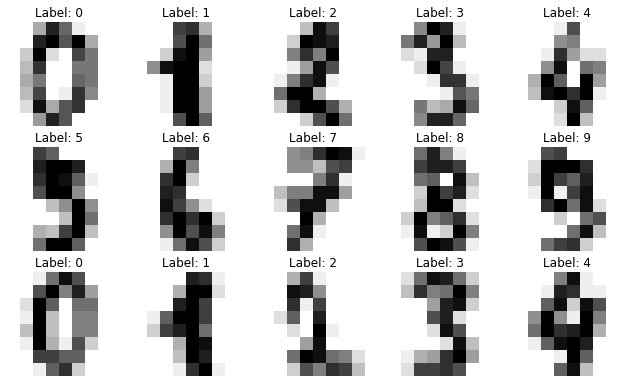

In [95]:
# make a plot
_, axes = plt.subplots(3, 5)
axes = axes.flatten()

for ax, image, label in zip(axes, data['images'], data['target']):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Label: {}'.format(label))

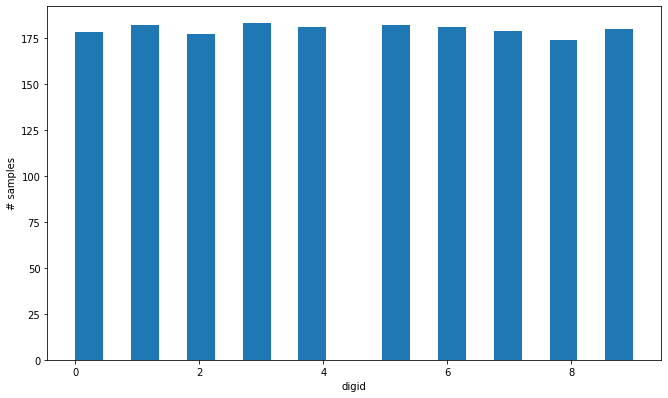

In [96]:
plt.xlabel('digid')
plt.ylabel('# samples')
plt.hist(y, bins=20)
plt.show()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

Для начала, вспомним как применять линейные модели для многоклассовой классификации

## One-vs-Rest

`sklearn.multiclass.OneVsRestClassifier` превращает модель бинарной классификации в модель многоклассовой по принципу One-vs-Rest

In [98]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(random_state=13, penalty='none', max_iter=3000))
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [99]:
classifier.predict_proba(X_test).shape

(450, 10)

In [ ]:
accuracy_score(y_pred, y_test)

**Задание** посчитайте roc_auc с макро усреднением

In [ ]:
from sklearn.metrics import roc_auc_score
?roc_auc_score

In [ ]:
# your code here
y_pred = classifier.predict_proba(X_test)
roc_auc_score(y_test, y_pred, average='macro', multi_class='ovr')

## One-vs-One

`sklearn.multiclass.OneVsOneClassifier` превращает модель бинарной классификации в модель многоклассовой по принципу One-vs-One

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
classifier = OneVsOneClassifier(LogisticRegression(random_state=13, penalty='none', max_iter=3000))
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

**Задание** посчитайте roc_auc

In [ ]:
# YOUR CODE HERE

## Decision Tree

Умеет работать в любым количеством классов

In [100]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

0.8466666666666667

Давайте попробуем улучшить результат решающего дерева.

**Задание** Ипользуя GridSearchCV подберите гиперпараметры модели DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state=13)

# define parameter grid
param_grid = {
    # YOUR CODE HERE
}

# fit 
# YOUR CODE HERE

In [ ]:
grid.best_params_

**Задание** Посчитайте точность лучшего алгоритма на тесте

In [ ]:
# YOUR CODE HERE

In [ ]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())